# Hugging Face Transformers Assignments

## 1. Sentiment Analysis

1. Create a new _nlp_transformers_ environment
2. Launch Jupyter Notebook
3. Read in the movie reviews data set including the VADER sentiment scores (_movie_reviews_sentiment.csv_)
4. Apply sentiment analysis to the _movie_info_ column using transformers
5. Compare the transformers sentiment scores with the VADER sentiment scores

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
import seaborn as sns
%config InlineBackend.figure_format ="svg"

In [ ]:
from google.colab import files
movie_reviews_upload = files.upload()

In [ ]:
df = pd.read_csv("movie_reviews_sentiment.csv")

In [ ]:
df.info(memory_usage=True , show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         166 non-null    object 
 1   rating              166 non-null    object 
 2   genre               166 non-null    object 
 3   in_theaters_date    166 non-null    object 
 4   movie_info          166 non-null    object 
 5   directors           166 non-null    object 
 6   director_gender     166 non-null    object 
 7   tomatometer_rating  166 non-null    int64  
 8   audience_rating     166 non-null    int64  
 9   critics_consensus   147 non-null    object 
 10  sentiment_vader     166 non-null    float64
dtypes: float64(1), int64(2), object(8)
memory usage: 14.4+ KB


In [ ]:
df.shape

(166, 11)

In [ ]:
df.head(5)

,movie_title,rating,genre,in_theaters_date,movie_info,directors,director_gender,tomatometer_rating,audience_rating,critics_consensus,sentiment_vader
0,A Dog's Journey,PG,"Drama, Kids & Family",5/17/19,"Bailey (voiced again by Josh Gad) is living the good life on the Michigan farm of his ""boy,"" Ethan (Dennis Quaid) and Ethan's wife Hannah (Marg Helgenberger). He even has a new playmate: Ethan and Hannah's baby granddaughter, CJ. The problem is that CJ's mom, Gloria (Betty Gilpin), decides to take CJ away. As Bailey's soul prepares to leave this life for a new one, he makes a promise to Ethan to find CJ and protect her at any cost. Thus begins Bailey's adventure through multiple lives filled with love, friendship and devotion as he, CJ (Kathryn Prescott), and CJ's best friend Trent (Henry Lau) experience joy and heartbreak, music and laughter, and few really good belly rubs.",Gail Mancuso,female,50,92,"A Dog's Journey is as sentimental as one might expect, but even cynical viewers may find their ability to resist shedding a tear stretched to the puppermost limit.",0.9837
1,A Dog's Way Home,PG,Drama,1/11/19,"Separated from her owner, a dog sets off on an 400-mile journey to get back to the safety and security of the place she calls home. Along the way, she meets a series of new friends and manages to bring a little bit of comfort and joy to their lives.",Charles Martin Smith,male,60,71,"A Dog's Way Home may not quite be a family-friendly animal drama fan's best friend, but this canine adventure is no less heartwarming for its familiarity.",0.9237
2,A Tuba to Cuba,NR,"Documentary, Musical & Performing Arts",2/15/19,"The leader of New Orleans' famed Preservation Hall Jazz Band seeks to fulfill his late father's dream of retracing their musical roots to the shores of Cuba in search of the indigenous music that gave birth to New Orleans jazz. A TUBA TO CUBA celebrates the triumph of the human spirit expressed through the universal language of music and challenges us to resolve to build bridges, not walls.","Danny Clinch, T.G. Herrington",male,100,82,NaN,0.9360
3,A Vigilante,R,Drama,3/29/19,"A once abused woman, Sadie (Olivia Wilde), devotes herself to ridding victims of their domestic abusers while hunting down the husband she must kill to truly be free. A Vigilante is a thriller inspired by the strength and bravery of real domestic abuse survivors and the incredible obstacles to safety they face.",Sarah Daggar-Nickson,female,92,50,"Led by Olivia Wilde's fearless performance and elevated by timely themes, A Vigilante is an uncompromising thriller that hits as hard as its protagonist.",-0.0334
4,After,PG-13,"Drama, Romance",4/12/19,"Based on Anna Todd's best-selling novel which became a publishing sensation on social storytelling platform Wattpad, AFTER follows Tessa (Langford), a dedicated student, dutiful daughter and loyal girlfriend to her high school sweetheart, as she enters her first semester in college. Armed with grand ambitions for her future, her guarded world opens up when she meets the dark and mysterious Hardin Scott (Tiffin), a magnetic, brooding rebel who makes her question all she thought she knew about herself and what she wants out of life.",Jenny Gage,female,17,72,"Tepid and tired, After's fun flourishes are let down by its generic story.",0.9349


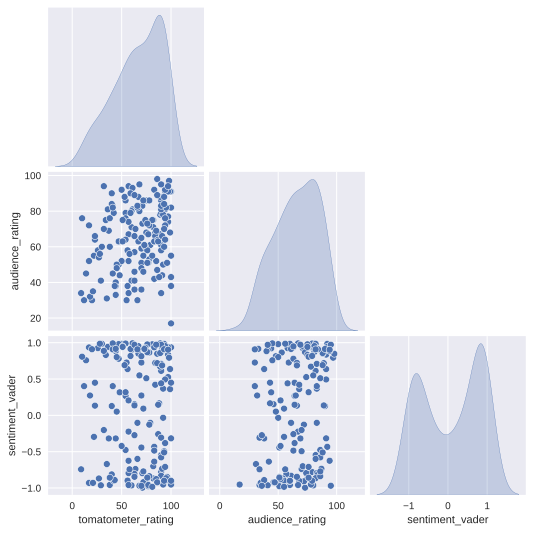

In [ ]:
sns.pairplot(df , corner = True , diag_kind="kde");

In [ ]:
# to activate the GPU:
import torch
#torch.cuda.is_available()

In [ ]:
%%time

from transformers import pipeline, logging

logging.set_verbosity_error()


sentiment_analyzer = pipeline("sentiment-analysis",
                              model = "distilbert/distilbert-base-uncased-finetuned-sst-2-english",
                              device = "cuda",
                              truncation = True,
                              use_fast = True)

torch.set_num_threads(1)

with torch.no_grad():
  sentiment_scores = df["movie_info"].apply(sentiment_analyzer)
sentiment_scores

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

CPU times: user 15.2 s, sys: 2.37 s, total: 17.5 s
Wall time: 27.8 s


,movie_info
0,"[{'label': 'POSITIVE', 'score': 0.9982469081878662}]"
1,"[{'label': 'POSITIVE', 'score': 0.9995336532592773}]"
2,"[{'label': 'POSITIVE', 'score': 0.9994434714317322}]"
3,"[{'label': 'POSITIVE', 'score': 0.9994601607322693}]"
4,"[{'label': 'POSITIVE', 'score': 0.9972022771835327}]"
...,...
161,"[{'label': 'POSITIVE', 'score': 0.9987725615501404}]"
162,"[{'label': 'POSITIVE', 'score': 0.9984967708587646}]"
163,"[{'label': 'POSITIVE', 'score': 0.9989098310470581}]"
164,"[{'label': 'POSITIVE', 'score': 0.9913572072982788}]"


In [ ]:
sentiment_scores[0][0]["label"]

'POSITIVE'

In [ ]:
sentiment_scores.apply(lambda x : x[0]["label"])

,movie_info
0,POSITIVE
1,POSITIVE
2,POSITIVE
3,POSITIVE
4,POSITIVE
...,...
161,POSITIVE
162,POSITIVE
163,POSITIVE
164,POSITIVE


In [ ]:
df["HF_Label"] = sentiment_scores.apply(lambda x : x[0]["label"])
df["HF_Score"] = sentiment_scores.apply(lambda x : x[0]["score"])

In [ ]:
#df["HF_Score"] = sentiment_scores.apply(lambda x: x[0]["score"] if x[0]["label"] == "POSITIVE" else -x[0]["score"])

In [ ]:
df["HF_Sentiment"] = df.apply(lambda row: row["HF_Score"] if row["HF_Label"] == "POSITIVE" else -row["HF_Score"] , axis =1)
# we want to apply it on each row, so we call axis = 1

In [ ]:
#df.columns = [col.title() for col in df.columns]

In [ ]:
df.columns

Index(['movie_title', 'rating', 'genre', 'in_theaters_date', 'movie_info',
       'directors', 'director_gender', 'tomatometer_rating', 'audience_rating',
       'critics_consensus', 'sentiment_vader', 'HF_Label', 'HF_Score',
       'HF_Sentiment'],
      dtype='object')

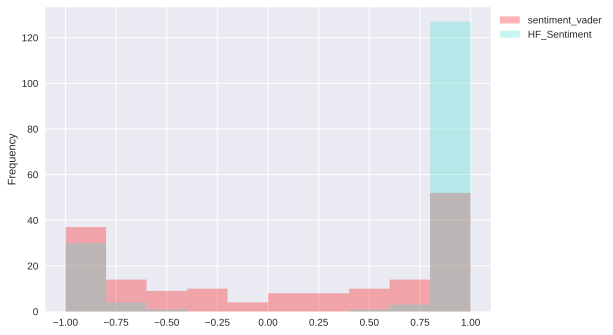

In [ ]:
df[["sentiment_vader","HF_Label","HF_Sentiment"]].plot(kind = "hist" , alpha = 0.3, bins = 10, color = ["red", "turquoise"])

plt.legend(bbox_to_anchor = (1,1))
plt.show()

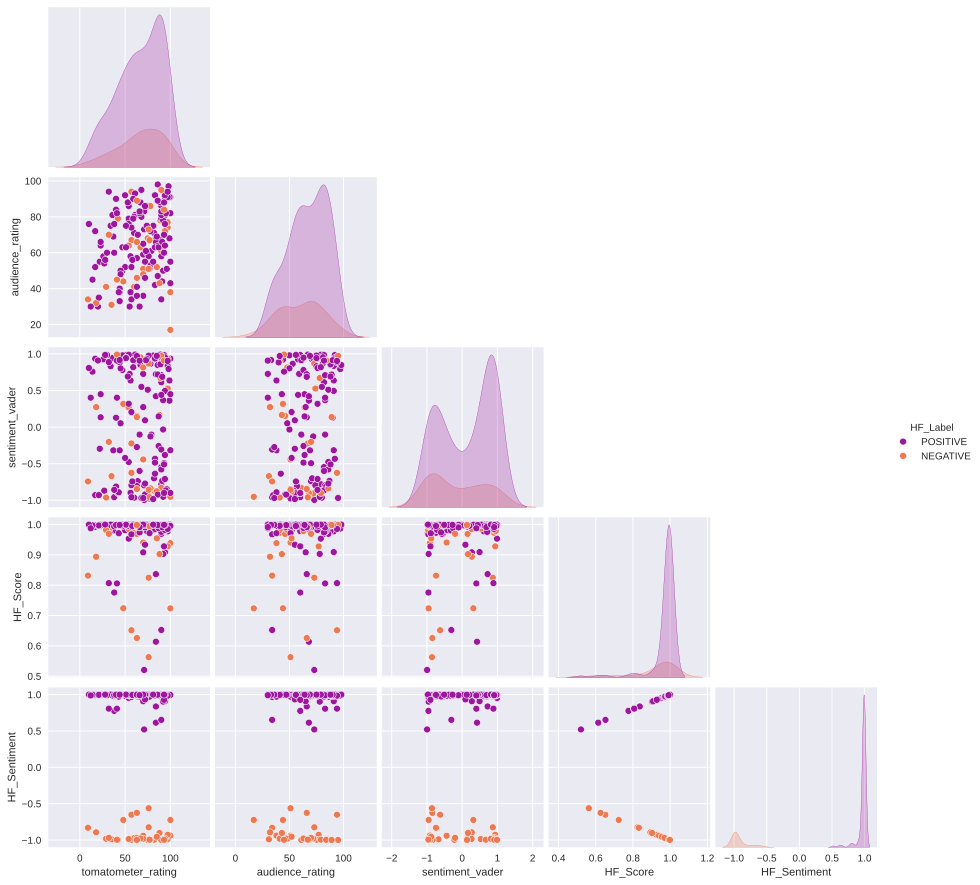

In [ ]:
import seaborn as sns
sns.pairplot(df ,
             diag_kind = "kde",
             corner = True,
             hue = "HF_Label",
             palette = "plasma")
sns.despine()

## 2. Named Entity Recognition

1. Read in the children's books data set (_childrens_books.csv_)
2. Apply NER to the Description column
3. Create a list of all named entities
4. Only include the people (PER)
5. _Extra credit:_ Exclude the authors as well

In [ ]:
from google.colab import files
children_books_upload = files.upload()

Saving childrens_books.csv to childrens_books.csv


In [ ]:
book_df = pd.read_csv("childrens_books.csv")
book_df

,Ranking,Title,Author,Year,Rating,Description
0,1,Where the Wild Things Are,Maurice Sendak,1963,4.25,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story."
1,2,The Very Hungry Caterpillar,Eric Carle,1969,4.34,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education."
2,3,The Giving Tree,Shel Silverstein,1964,4.38,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice."
3,4,Green Eggs and Ham,Dr. Seuss,1960,4.31,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers."
4,5,Goodnight Moon,Margaret Wise Brown,1947,4.31,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading."
...,...,...,...,...,...,...
95,96,Stone Soup,Jon J. Muth,2003,4.18,"Stone Soup is a classic folktale retold by Jon J. Muth, in which three soldiers arrive in a village, claiming they can make soup from stones. The villagers, initially hesitant, eventually contribute ingredients to the pot, and together they create a delicious meal. This story is a heartwarming lesson about sharing, community, and cooperation, enhanced by Muth’s beautiful watercolor illustrations."
96,97,A Light in the Attic,Shel Silverstein,1981,4.36,"A Light in the Attic is a collection of quirky poems and illustrations by Shel Silverstein, exploring a wide range of topics with wit, humor, and imagination. The poems are funny, thoughtful, and sometimes absurd, but they all carry a sense of wonder and creativity. Silverstein’s distinctive voice and whimsical illustrations make this book a timeless collection that continues to entertain children and adults alike."
97,98,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",J.K. Rowling,1999,4.58,"Harry Potter and the Prisoner of Azkaban is the third book in the Harry Potter series, where Harry returns to Hogwarts for his third year and uncovers secrets about his past. With the arrival of the mysterious Sirius Black, Harry must navigate dark truths and face his fears. This thrilling installment explores themes of loyalty, friendship, and identity, marking a turning point in the magical world of Harry Potter."
98,99,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",J.K. Rowling,1998,4.43,"Harry Potter and the Chamber of Secrets is the second book in the Harry P

In [ ]:
from transformers import pipeline

ner_analyzer = pipeline("ner",
                        model = "dbmdz/bert-large-cased-finetuned-conll03-english",
                        device= -1 ,
                        aggregation_strategy = 'SIMPLE')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
ner_analyzer(book_df["Description"][0])

[{'entity_group': 'MISC',
  'score': np.float32(0.94625187),
  'word': 'Where the Wild Things Are',
  'start': 0,
  'end': 25},
 {'entity_group': 'PER',
  'score': np.float32(0.9990614),
  'word': 'Max',
  'start': 34,
  'end': 37},
 {'entity_group': 'PER',
  'score': np.float32(0.9984414),
  'word': 'Max',
  'start': 175,
  'end': 178},
 {'entity_group': 'PER',
  'score': np.float32(0.9789461),
  'word': 'Sendak',
  'start': 380,
  'end': 386}]

In [ ]:
list(set([entity['word'] for entity in ner_analyzer(book_df["Description"][0])]))

['Sendak', 'Max', 'Where the Wild Things Are']

In [ ]:
book_df["Description"].apply(ner_analyzer)

,Description
0,"[{'entity_group': 'MISC', 'score': 0.94625187, 'word': 'Where the Wild Things Are', 'start': 0, 'end': 25}, {'entity_group': 'PER', 'score': 0.9990614, 'word': 'Max', 'start': 34, 'end': 37}, {'entity_group': 'PER', 'score': 0.9984414, 'word': 'Max', 'start': 175, 'end': 178}, {'entity_group': 'PER', 'score': 0.9789461, 'word': 'Sendak', 'start': 380, 'end': 386}]"
1,"[{'entity_group': 'MISC', 'score': 0.4866198, 'word': 'Very', 'start': 4, 'end': 8}, {'entity_group': 'MISC', 'score': 0.6390439, 'word': 'Cat', 'start': 16, 'end': 19}, {'entity_group': 'PER', 'score': 0.34548068, 'word': '##pi', 'start': 21, 'end': 23}, {'entity_group': 'MISC', 'score': 0.46603718, 'word': '##llar', 'start': 23, 'end': 27}, {'entity_group': 'PER', 'score': 0.99932796, 'word': 'Eric Carle', 'start': 137, 'end': 147}]"
2,"[{'entity_group': 'MISC', 'score': 0.8685477, 'word': 'Giving Tree', 'start': 4, 'end': 15}, {'entity_group': 'PER', 'score': 0.98887664, 'word': 'Silverstein', 'start': 244, 'end': 255}]"
3,"[{'entity_group': 'MISC', 'score': 0.9844147, 'word': 'Green Eggs and Ham', 'start': 3, 'end': 21}, {'entity_group': 'PER', 'score': 0.8551589, 'word': 'Sam - I - Am', 'start': 23, 'end': 31}, {'entity_group': 'PER', 'score': 0.9766476, 'word': 'Dr. Seuss', 'start': 163, 'end': 172}]"
4,"[{'entity_group': 'MISC', 'score': 0.7211042, 'word': 'Goodnight Moon', 'start': 0, 'end': 14}, {'entity_group': 'PER', 'score': 0.9983432, 'word': 'Clement Hurd', 'start': 276, 'end': 288}]"
...,...
95,"[{'entity_group': 'MISC', 'score': 0.75983953, 'word': 'Stone Soup', 'start': 0, 'end': 10}, {'entity_group': 'PER', 'score': 0.9909401, 'word': 'Jon J. Muth', 'start': 43, 'end': 54}, {'entity_group': 'PER', 'score': 0.99311435, 'word': 'Muth', 'start': 357, 'end': 361}]"
96,"[{'entity_group': 'MISC', 'score': 0.8829532, 'word': 'Attic', 'start': 15, 'end': 20}, {'entity_group': 'PER', 'score': 0.9982841, 'word': 'Shel Silverstein', 'start': 74, 'end': 90}, {'entity_group': 'PER', 'score': 0.9964281, 'word': 'Silverstein', 'start': 267, 'end': 278}]"
97,"[{'entity_group': 'MISC', 'score': 0.97588116, 'word': 'Harry Potter and the Prisoner of Azkaban', 'start': 0, 'end': 40}, {'entity_group': 'MISC', 'score': 0.95647085, 'word': 'Harry Potter', 'start': 66, 'end': 78}, {'entity_group': 'PER', 'score': 0.9832532, 'word': 'Harry', 'start': 93, 'end': 98}, {'entity_group': 'LOC', 'score': 0.8709017, 'word': 'Hogwarts', 'start': 110, 'end': 118}, {'entity_group': 'PER', 'score': 0.99429584, 'word': 'Sirius Black', 'start': 210, 'end': 222}, {'entity_group': 'PER', 'score': 0.9944066, 'word': 'Harry', 'start': 224, 'end': 229}, {'entity_group': 'MISC', 'score': 0.88542974, 'word': 'Harry Potter', 'start': 405, 'end': 417}]"
98,"[{'entity_group': 'MISC', 'score': 0.9780797, 'word': 'Harry Potter and the Chamber of Secrets', 'start': 0, 'end': 39}, {'entity_group': 'MISC', 'score': 0.9545964, 'word': 'Harry Potter', 'start': 66, 'end': 78}, {'entity_group': 'PER', 'score': 0.9870489, 'word': 'Harry', 'start': 93, 'end': 98}, {'entity_group': 'LOC', 'score': 0.8845856, 'word': 'Hogwarts', 'start': 110, 'end': 118}, {'entity_group': 'PER', 'score': 0.9925713, 'word': 'Harry', 'start': 217, 'end': 222}, {'entity_group': 'PER', 'score': 0.9964104, 'word': 'Ron', 'start': 239, 'end': 242}, {'entity_group': 'PER', 'score': 0.97681254, 'word': 'Hermione', 'start': 247, 'end': 255}]"


In [ ]:
book_df["Named_Entity"] = book_df["Description"].apply(lambda x : [entity['word'] for entity in ner_analyzer(x)])
book_df["Named_Entity"]

,Named_Entity
0,"[Where the Wild Things Are, Max, Max, Sendak]"
1,"[Very, Cat, ##pi, ##llar, Eric Carle]"
2,"[Giving Tree, Silverstein]"
3,"[Green Eggs and Ham, Sam - I - Am, Dr. Seuss]"
4,"[Goodnight Moon, Clement Hurd]"
...,...
95,"[Stone Soup, Jon J. Muth, Muth]"
96,"[Attic, Shel Silverstein, Silverstein]"
97,"[Harry Potter and the Prisoner of Azkaban, Harry Potter, Harry, Hogwarts, Sirius Black, Harry, Harry Potter]"
98,"[Harry Potter and the Chamber of Secrets, Harry Potter, Harry, Hogwarts, Harry, Ron, Hermione]"


In [ ]:
all_named_entities = list(set(list(book_df["Named_Entity"].explode())))
all_named_entities

['Are Friends',
 'Where the Wild Things Are',
 'Galdone',
 'Goodnight Moon',
 'Matthew Cuthbert',
 'Make Way for Ducklings',
 '##a the P',
 'Silverstein',
 'Harry Potter and the Chamber of Secrets',
 'Miss Honey',
 'The Wonderful Wizard of Oz',
 'Santa',
 'Drive the Bus!',
 'One Fish',
 'Sal',
 'Ways',
 'Fantastica',
 'The Stinky Cheese Man',
 'Ramona Quimby',
 'Snowy Day',
 'Lorax',
 'Freeman',
 'Konigsburg',
 'Up',
 'Harry',
 'Mary Lennox',
 'True Story of the 3 Little Pigs',
 'End',
 'Huck Finn',
 'Paris',
 'The Chronicles of Narnia',
 'Blue Fish',
 'Two Fish',
 'The Polar Express',
 'Grover',
 'Alexander',
 'and',
 'Norwegian',
 'Seuss',
 'Frog',
 'Harry Potter',
 'Max',
 'Giver',
 'Swedish',
 'The Velveteen Rabbit',
 'and the Purple Crayon',
 'and the Giant Peach',
 'Chocolate Factory',
 'Meg',
 'A. Rey',
 '##r',
 '##ug',
 '##F',
 '##G',
 'the Big Red Dog',
 'Bunnicula',
 'Story of',
 'Tom',
 'Amelia Bedelia',
 'Laura',
 'The Poky Little Puppy',
 'Who',
 'Claudia',
 '##rin',
 'Atr

In [ ]:
book_df["PER_Entity"] = book_df["Description"].apply(lambda x : [entity['word'] for entity in ner_analyzer(x) if entity['entity_group'] == "PER"])
book_df["PER_Entity"]

,PER_Entity
0,"[Max, Max, Sendak]"
1,"[##pi, Eric Carle]"
2,[Silverstein]
3,"[Sam - I - Am, Dr. Seuss]"
4,[Clement Hurd]
...,...
95,"[Jon J. Muth, Muth]"
96,"[Shel Silverstein, Silverstein]"
97,"[Harry, Sirius Black, Harry]"
98,"[Harry, Harry, Ron, Hermione]"


In [ ]:
PER_named_entities = list(set(list(book_df["PER_Entity"].explode())))

In [ ]:
PER_named_entities

['Charlotte',
 'Stellaluna',
 'Tikki Tikki Tembo',
 'Muth',
 'Milo',
 'Grinch',
 'Galdone',
 'Arnold Lobel',
 'Milne',
 'Calvin',
 'George',
 nan,
 'Miss Nelson',
 'Clifford',
 'Beatrix Potter',
 'Matilda',
 'Corduroy',
 'Santa Claus',
 'Becky Thatcher',
 'Matthew Cuthbert',
 nan,
 'Cat in the Hat',
 'Bastian',
 'Marilla',
 'Piglet',
 'Lane Smith',
 'Silverstein',
 'Big Bad Wolf',
 nan,
 'Jess',
 'Sachar',
 'Miss Honey',
 'B',
 'Mary',
 nan,
 'Roald Dahl',
 '##y',
 'Despereaux',
 'Santa',
 'Camilla Cream',
 'Basil E. Frankweiler',
 'Sal',
 'Aslan',
 'Pippi',
 'Despereaux Tilling',
 nan,
 nan,
 'Joe Harper',
 'Wizard',
 '##per',
 'Ramona Quimby',
 'Bun',
 'Chrysanthemum',
 'Rabbit',
 'Lorax',
 nan,
 'Freeman',
 'Konigsburg',
 'Ralph',
 'Harry',
 'White',
 'Mary Lennox',
 'Keats',
 nan,
 'Clement Hurd',
 'Cleary',
 'Olivia',
 '##ki T',
 nan,
 'Huck Finn',
 'Sc',
 'Big Friendly Giant',
 'Ferdinand',
 nan,
 'Lisa',
 'Alice',
 'Bilbo',
 'Tolkien',
 'Willems',
 'McGregor',
 'Bemelmans',
 'Je

In [ ]:
Authors = list(set(book_df["Author"].tolist()))
Authors

['P.D. Eastman',
 'L. Frank Baum',
 'A.A. Milne',
 'E.B. White',
 'Else Holmelund Minarik',
 'Norman Bridwell',
 'Frances Hodgson Burnett',
 'J.K. Rowling',
 'Antoine de Saint-Exupéry',
 'Arnold Lobel',
 'Ian Falconer',
 'Shel Silverstein',
 'Judith Viorst',
 'Sam McBratney',
 'Munro Leaf',
 'David Shannon',
 'Janell Cannon',
 'Katherine Paterson',
 'L.M. Montgomery',
 'Maurice Sendak',
 'Beatrix Potter',
 'Kevin Henkes',
 'Harry Allard',
 'E.L. Konigsburg',
 'Ezra Jack Keats',
 'J.R.R. Tolkien',
 'Kate DiCamillo',
 'Margaret Wise Brown',
 'Norton Juster',
 'Paul Galdone',
 'Peggy Parish',
 'Beverly Cleary',
 'Margery Williams Bianco',
 'Laura Joffe Numeroff',
 'Jean de Brunhoff',
 'Jon J. Muth',
 'Bill Martin Jr. and Eric Carle',
 'H.A. Rey',
 'Don Freeman',
 'Judi Barrett',
 'Marcus Pfister',
 'Lois Lowry',
 'Lynne Reid Banks',
 'Virginia Lee Burton',
 'Lewis Carroll',
 'Astrid Lindgren',
 'Doreen Cronin',
 'Jon Scieszka',
 'C.S. Lewis',
 'Ludwig Bemelmans',
 'Dr. Seuss',
 'Roald Dah

In [ ]:
named_entities_clean = [entity for entity in PER_named_entities if entity not in Authors]
named_entities_clean

['Charlotte',
 'Stellaluna',
 'Tikki Tikki Tembo',
 'Muth',
 'Milo',
 'Grinch',
 'Galdone',
 'Milne',
 'Calvin',
 'George',
 nan,
 'Miss Nelson',
 'Clifford',
 'Matilda',
 'Corduroy',
 'Santa Claus',
 'Becky Thatcher',
 'Matthew Cuthbert',
 nan,
 'Cat in the Hat',
 'Bastian',
 'Marilla',
 'Piglet',
 'Lane Smith',
 'Silverstein',
 'Big Bad Wolf',
 nan,
 'Jess',
 'Sachar',
 'Miss Honey',
 'B',
 'Mary',
 nan,
 '##y',
 'Despereaux',
 'Santa',
 'Camilla Cream',
 'Basil E. Frankweiler',
 'Sal',
 'Aslan',
 'Pippi',
 'Despereaux Tilling',
 nan,
 nan,
 'Joe Harper',
 'Wizard',
 '##per',
 'Ramona Quimby',
 'Bun',
 'Chrysanthemum',
 'Rabbit',
 'Lorax',
 nan,
 'Freeman',
 'Konigsburg',
 'Ralph',
 'Harry',
 'White',
 'Mary Lennox',
 'Keats',
 nan,
 'Clement Hurd',
 'Cleary',
 'Olivia',
 '##ki T',
 nan,
 'Huck Finn',
 'Sc',
 'Big Friendly Giant',
 'Ferdinand',
 nan,
 'Lisa',
 'Alice',
 'Bilbo',
 'Tolkien',
 'Willems',
 'McGregor',
 'Bemelmans',
 'Jess Aarons',
 nan,
 'Cowardly Lion',
 'Grover',
 'Al

## 3. Zero-Shot Classification

1. Apply zero-shot classification to the Description column using these five categories:
* adventure & fantasy
* animals & nature
* mystery
* humor
* non-fiction
2. Find the number of books in each category and check a few to see if the results make sense

In [ ]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification",
                      model = "facebook/bart-large-mnli",
                      device = 'cuda')

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
candidate_labels = ["adventure & fantasy" , "animals & nature" , "mystery" , "humor" , "non-fiction"]

In [ ]:
pd.DataFrame(classifier(book_df["Description"].iloc[0] ,candidate_labels))

,sequence,labels,scores
0,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",adventure & fantasy,0.401903
1,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",animals & nature,0.306491
2,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",humor,0.149989
3,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",mystery,0.071163
4,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",non-fiction,0.070453


In [ ]:
classifier(book_df["Description"].iloc[0] , candidate_labels)["labels"][0]

'adventure & fantasy'

In [ ]:
book_df["Category"] = book_df["Description"].apply(lambda x : classifier(x , candidate_labels)['labels'][0])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
book_df[["Description" , "Category"]]

,Description,Category
0,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.",adventure & fantasy
1,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.",animals & nature
2,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.",non-fiction
3,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.",humor
4,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading.",animals & nature
...,...,...
95,"Stone Soup is a classic folktale retold by Jon J. Muth, in which three soldiers arrive in a village, claiming they can make soup from stones. The villagers, initially hesitant, eventually contribute ingredients to the pot, and together they create a delicious meal. This story is a heartwarming lesson about sharing, community, and cooperation, enhanced by Muth’s beautiful watercolor illustrations.",mystery
96,"A Light in the Attic is a collection of quirky poems and illustrations by Shel Silverstein, exploring a wide range of topics with wit, humor, and imagination. The poems are funny, thoughtful, and sometimes absurd, but they all carry a sense of wonder and creativity. Silverstein’s distinctive voice and whimsical illustrations make this book a timeless collection that continues to entertain children and adults alike.",humor
97,"Harry Potter and the Prisoner of Azkaban is the third book in the Harry Potter series, where Harry returns to Hogwarts for his third year and uncovers secrets about his past. With the arrival of the mysterious Sirius Black, Harry must navigate dark truths and face his fears. This thrilling installment explores themes of loyalty, friendship, and identity, marking a turning point in the magical world of Harry Potter.",mystery
98,"Harry Potter and the Chamber of Secrets is the second book in the Harry Potter series, where Harry returns to Hogwarts for his second year and uncovers a hidden chamber within the school. As mysterious events unfold, Harry and his friends Ron and Hermione uncover dark secrets about the school’s past. Themes of courage, friendship, and standing up for what’s right are explored in this gripping magical adventure.",mystery


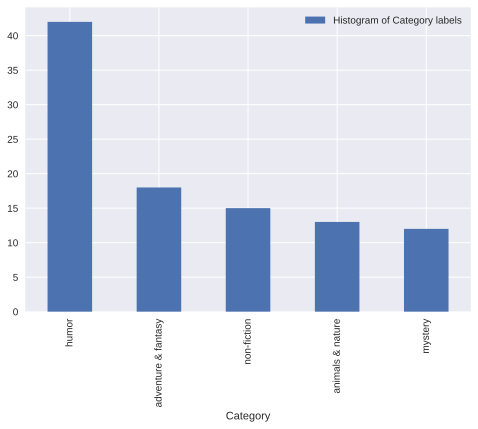

In [ ]:
book_df.Category.value_counts().plot(kind = "bar", label = "Histogram of Category labels")
plt.legend()
plt.show()

## 4. Text Summarization

1. Apply text summarization to the Description column
2. Review the results to see if they make sense

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization",
                      model = "facebook/bart-large-cnn",
                      device = 'cuda' #or -1
                      )

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


In [ ]:
summarizer(book_df["Description"].iloc[0], early_stopping = True)

Your max_length is set to 142, but your input_length is only 89. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=44)


[{'summary_text': "Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story."}]

In [ ]:
summarizer(book_df["Description"].iloc[0] , early_stopping = True, min_length = 20 , max_length = 50)

[{'summary_text': 'Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. This iconic book explores themes of imagination, adventure, and'}]

In [ ]:
summarizer(book_df["Description"].iloc[0] ,
           min_length = 20 ,
           max_length = 50,
           length_penalty = 0.8)[0]['summary_text']

'Where the Wild Things Are follows Max, a young boy who imagines sailing to an island filled with wild creatures. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood.'

In [ ]:
book_df["Summary_of_Description"] = book_df["Description"].apply(lambda x : summarizer(x,
                                                                                       min_length = 10,
                                                                                       max_length = 50,
                                                                                       early_stopping = True,
                                                                                       length_penalty = 0.8)[0]['summary_text'])

In [ ]:
book_df[["Description","Summary_of_Description","Category"]]

,Description,Summary_of_Description,Category
0,"Where the Wild Things Are follows Max, a young boy who, after being sent to his room for misbehaving, imagines sailing to an island filled with wild creatures. As their king, Max tames the beasts and eventually returns home to find his supper waiting for him. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood, all captured through Sendak's whimsical illustrations and story.","Where the Wild Things Are follows Max, a young boy who imagines sailing to an island filled with wild creatures. This iconic book explores themes of imagination, adventure, and the complex emotions of childhood.",adventure & fantasy
1,"The Very Hungry Caterpillar tells the story of a caterpillar who eats through a variety of foods before eventually becoming a butterfly. Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of metamorphosis. It’s a staple in early childhood education.","Eric Carle’s use of colorful collage illustrations and rhythmic text has made this book a beloved classic for young readers. The simple, engaging story introduces children to days of the week, counting, and the concept of met",animals & nature
2,"The Giving Tree is a touching and bittersweet story about a tree that gives everything it has to a boy over the course of his life. As the boy grows up, he takes more from the tree, and the tree continues to give, even when it has little left. Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.","Silverstein’s minimalist text and illustrations convey deep themes of unconditional love, selflessness, and the passage of time. It has sparked much discussion about relationships and sacrifice.",non-fiction
3,"In Green Eggs and Ham, Sam-I-Am tries to convince a reluctant character to try a dish of green eggs and ham, despite his resistance. Through repetition and rhyme, Dr. Seuss’s classic story about being open to new experiences encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.",Dr. Seuss’s classic story encourages children to be adventurous and try things outside their comfort zone. The playful illustrations and humorous dialogue make it a fun and educational read for young readers.,humor
4,"Goodnight Moon is a gentle, rhythmic bedtime story where a little bunny says goodnight to everything in his room, from the moon to the ""quiet old lady whispering hush."" Its repetitive structure and comforting tone make it ideal for young children. The simple illustrations by Clement Hurd complement the soothing nature of the story, making it a beloved classic for sleep-time reading.","Goodnight Moon is a gentle, rhythmic bedtime story. The simple illustrations by Clement Hurd complement the soothing nature of the story.",animals & nature
...,...,...,...
95,"Stone Soup is a classic folktale retold by Jon J. Muth, in which three soldiers arrive in a village, claiming they can make soup from stones. The villagers, initially hesitant, eventually contribute ingredients to the pot, and together they create a delicious meal. This story is a heartwarming lesson about sharing, community, and cooperation, enhanced by Muth’s beautiful watercolor illustrations.","Stone Soup is a classic folktale retold by Jon J. Muth. Three soldiers arrive in a village, claiming they can make soup from stones. The villagers, initially hesitant, eventually contribute ingredients to the pot.",mystery
96,"A Light in the Attic is a collection of quirky poems and illustrations by Shel Silverstein, exploring a wide range of topics with wit, humor, and ima

## 5. Document Similarity

1. Turn the Description column into embeddings using feature extraction
2. Compare the cosine similarity of Harry Potter and the Sorcerer’s Stone compared to all other books
3. Return the top 5 most similar books

In [ ]:
from transformers import pipeline

feature_extractor = pipeline("feature-extraction",
                             model = "sentence-transformers/all-MiniLM-L6-v2",
                             device = "cuda")


Device set to use cuda


In [ ]:
feature_extractor(book_df["Description"][0])

[[[0.17135247588157654,
   0.21920034289360046,
   0.023439886048436165,
   0.14603601396083832,
   0.09078323841094971,
   -0.0735427588224411,
   0.025495491921901703,
   -0.08237519860267639,
   -0.4054500162601471,
   -0.0031997396145015955,
   -0.10306091606616974,
   -0.0037939026951789856,
   -0.28213903307914734,
   0.24613496661186218,
   0.21046462655067444,
   -0.09948410838842392,
   0.30823814868927,
   -0.0019044881919398904,
   -0.059886425733566284,
   -0.08923111855983734,
   -0.08314357697963715,
   0.28193265199661255,
   0.18756714463233948,
   -0.010089127346873283,
   -0.2347835898399353,
   -0.014897981658577919,
   -0.3666580319404602,
   -0.11721519380807877,
   0.18829520046710968,
   -0.9992691874504089,
   -0.1453477293252945,
   -0.23778390884399414,
   0.05936276540160179,
   -0.15320420265197754,
   -0.026063714176416397,
   0.09265770763158798,
   -0.23046134412288666,
   -0.230145663022995,
   0.1413375586271286,
   -0.035516176372766495,
   -0.06441079

In [ ]:
feature_extractor(book_df["Description"][0]).size

AttributeError: 'list' object has no attribute 'size'

In [ ]:
feature_extractor(book_df["Description"][0])[0][0]

[0.17135247588157654,
 0.21920034289360046,
 0.023439886048436165,
 0.14603601396083832,
 0.09078323841094971,
 -0.0735427588224411,
 0.025495491921901703,
 -0.08237519860267639,
 -0.4054500162601471,
 -0.0031997396145015955,
 -0.10306091606616974,
 -0.0037939026951789856,
 -0.28213903307914734,
 0.24613496661186218,
 0.21046462655067444,
 -0.09948410838842392,
 0.30823814868927,
 -0.0019044881919398904,
 -0.059886425733566284,
 -0.08923111855983734,
 -0.08314357697963715,
 0.28193265199661255,
 0.18756714463233948,
 -0.010089127346873283,
 -0.2347835898399353,
 -0.014897981658577919,
 -0.3666580319404602,
 -0.11721519380807877,
 0.18829520046710968,
 -0.9992691874504089,
 -0.1453477293252945,
 -0.23778390884399414,
 0.05936276540160179,
 -0.15320420265197754,
 -0.026063714176416397,
 0.09265770763158798,
 -0.23046134412288666,
 -0.230145663022995,
 0.1413375586271286,
 -0.035516176372766495,
 -0.06441079825162888,
 0.07449237257242203,
 -0.08746077865362167,
 0.10298546403646469,
 -0.

In [ ]:
embeddings = book_df["Description"].apply(lambda x: feature_extractor(x)[0][0])

In [ ]:
book_embeddings = np.vstack(embeddings)
book_embeddings

array([[ 1.71352476e-01,  2.19200343e-01,  2.34398860e-02, ...,
         1.31564647e-01, -4.52227294e-01, -1.23783752e-01],
       [ 1.81409627e-01,  3.27867657e-01,  3.01267654e-01, ...,
         3.38818163e-01, -1.27443671e-01, -2.86018670e-01],
       [ 1.21550463e-01,  1.74066186e-01,  1.04070179e-01, ...,
        -1.70029983e-01,  5.60834147e-02, -2.78954923e-01],
       ...,
       [ 2.10943013e-01,  8.17951933e-02, -4.68396038e-01, ...,
        -5.26785443e-04, -2.65192151e-01, -4.15540457e-01],
       [ 2.35989764e-02,  2.63330311e-01, -1.81206805e-03, ...,
         5.28995454e-01, -2.83109546e-01, -3.27891797e-01],
       [ 2.10108250e-01,  1.38690054e-01, -2.34473273e-01, ...,
        -3.31904888e-01, -3.44270887e-03,  6.36785328e-02]])

In [ ]:
book_embeddings.shape

(100, 384)

In [ ]:
target_book = "Harry Potter and the Sorcerer's Stone"
target_index = int(book_df["Title"][book_df["Title"].str.contains(target_book) == True].index[0])
target_index

13

In [ ]:
book_embeddings[target_index].shape

(384,)

In [ ]:
embedding_target = book_embeddings[target_index].reshape(1,-1) #HP: Harry Potter
embedding_target.shape

(1, 384)

In [ ]:
book_embeddings.shape

(100, 384)

In [ ]:
embedding_target.shape

(1, 384)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(embedding_target , book_embeddings).shape

(1, 100)

In [ ]:
cosine_similarity(embedding_target , book_embeddings)

array([[0.72034971, 0.69734834, 0.69089767, 0.64561999, 0.70594156,
        0.6797676 , 0.73073506, 0.67015157, 0.70912398, 0.72258798,
        0.70033455, 0.66319306, 0.72020062, 1.        , 0.72522263,
        0.65862756, 0.70014699, 0.70879857, 0.65770993, 0.64990627,
        0.72828334, 0.67960672, 0.67681139, 0.73601162, 0.69900094,
        0.76056398, 0.697999  , 0.7166076 , 0.73818672, 0.63767498,
        0.72923566, 0.65902885, 0.73896112, 0.68094653, 0.65546493,
        0.75854065, 0.71273212, 0.6681807 , 0.6262496 , 0.70980159,
        0.67738442, 0.6913113 , 0.77341718, 0.71917389, 0.65934499,
        0.66990441, 0.6703475 , 0.68437899, 0.70973578, 0.73095604,
        0.59742979, 0.64784874, 0.642562  , 0.63228165, 0.6486227 ,
        0.78852272, 0.67590781, 0.74838476, 0.67803553, 0.68519289,
        0.70473174, 0.63852743, 0.64281096, 0.799051  , 0.63090722,
        0.67436684, 0.67719136, 0.7297663 , 0.67164469, 0.68139205,
        0.64435519, 0.67604817, 0.69912482, 0.72

In [ ]:
similarity_scores_target = pd.Series(cosine_similarity(embedding_target , book_embeddings).flatten() ,
                                     name = "target_similarity").sort_values(ascending = False)
similarity_scores_target

,target_similarity
13,1.000000
97,0.872638
98,0.855368
63,0.799051
55,0.788523
...,...
53,0.632282
64,0.630907
38,0.626250
50,0.597430


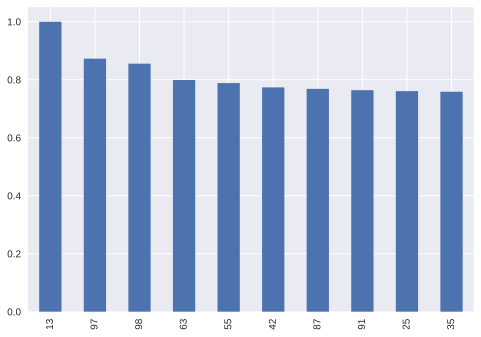

In [ ]:
similarity_scores_target[:10].plot(kind = "bar")
plt.show()

In [ ]:
book_similarity_scores = pd.concat([book_df[["Title","Description"]], similarity_scores_target], axis = 1)
book_similarity_scores.sort_values(["target_similarity"], ascending=False)

,Title,Description,target_similarity
13,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","Harry Potter and the Sorcerer’s Stone introduces readers to Harry Potter, an orphan who discovers that he is a wizard and attends the magical Hogwarts School of Witchcraft and Wizardry. Along with his new friends, Harry uncovers mysteries surrounding his past and the dark wizard who killed his parents. This book starts the beloved series and sets the stage for Harry’s journey, filled with magic, adventure, and friendship.",1.000000
97,"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)","Harry Potter and the Prisoner of Azkaban is the third book in the Harry Potter series, where Harry returns to Hogwarts for his third year and uncovers secrets about his past. With the arrival of the mysterious Sirius Black, Harry must navigate dark truths and face his fears. This thrilling installment explores themes of loyalty, friendship, and identity, marking a turning point in the magical world of Harry Potter.",0.872638
98,"Harry Potter and the Chamber of Secrets (Harry Potter, #2)","Harry Potter and the Chamber of Secrets is the second book in the Harry Potter series, where Harry returns to Hogwarts for his second year and uncovers a hidden chamber within the school. As mysterious events unfold, Harry and his friends Ron and Hermione uncover dark secrets about the school’s past. Themes of courage, friendship, and standing up for what’s right are explored in this gripping magical adventure.",0.855368
63,The Witches,"The Witches tells the story of a young boy and his grandmother who uncover a secret society of witches who despise children and plot to turn them all into mice. With the help of his grandmother, the boy must outwit the witches and save the children. The book is known for its dark humor, thrilling suspense, and memorable characters. Though it can be a bit scary, it is beloved for its unique blend of fear, adventure, and courage.",0.799051
55,"The Wonderful Wizard of Oz (Oz, #1)","The Wonderful Wizard of Oz is the first book in Baum's Oz series and tells the story of Dorothy, a young girl from Kansas who is swept away to the magical land of Oz. Along with her new friends—the Scarecrow, Tin Man, and Cowardly Lion—Dorothy embarks on a journey to meet the Wizard and find her way home. The book is filled with themes of friendship, courage, and the belief in oneself, and has become an iconic tale in American literature.",0.788523
...,...,...,...
53,"Little House in the Big Woods (Little House, #1)","Little House in the Big Woods is the first book in the Little House series, which chronicles the early years of Laura Ingalls and her family as they live on a farm in Wisconsin. The story reflects the simple, hard-working life of pioneer families, showcasing the values of self-sufficiency, family, and the beauty of nature. With its nostalgic, homely atmosphere, the book provides an intimate glimpse into life in the American frontier.",0.632282
64,Clifford the Big Red Dog,"Clifford the Big Red Dog introduces readers to Clifford, a giant red dog who is loved by his owner Emily Elizabeth despite his enormous size and the trouble he causes. The book explores themes of friendship, acceptance, and the joy of being different. The simple, colorful illustrations and heartwarming story make it an ideal read for young children, teaching them important lessons about love and loyalty.",0.630907
38,The Little Engine That Could,"The Little Engine That Could is a classic children's story about a small engine who, despite being told it’s too small to pull a heavy load, believes in itself and succeeds in helping other trains cross a mountain. The story’s central message of perseverance and self-belief has made it an enduring motivational tale for young readers. Its rhythmic, repetitive text and simple illustrations make it especially appealing for early readers.",0.626250
50,Don't Let the Pigeon Drive the Bus!,"Don't Let the Pigeon Drive the Bus! is